In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import imread
from scipy.misc import imresize
%matplotlib inline

In [67]:
tr = np.transpose
imshow = plt.imshow

In [104]:
#penny = imread('/home/elie/Images/scans/penny/zoom4/montage/final.jpg')
penny = imread('/home/elie/Images/scans/penny/zoom4/montage/final-nocoin.jpg')
penny_small = imresize(penny, 0.02)

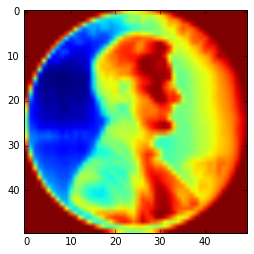

In [105]:
imshow(penny_small)

In [114]:
gcodefile = open('/tmp/penny.gcode', 'w')
gcodefile.write("""
; Header
G92

""")

def go(x, y, z, f=None):
    if f is not None:
        gcodefile.write("G1 %s Y%s Z%s F%s\n" % (x, y, z, f))
    else:
        gcodefile.write("G1 X%s Y%s Z%s\n" % (x, y, z))

In [115]:
signal = penny_small
go(0, 0, 0)
l2r = range(signal.shape[0])
r2l = range(signal.shape[0] - 1, -1, -1)
b2f = range(signal.shape[1])
f2b = range(signal.shape[1] - 1, -1, -1)

z_step = 0.6
total_thickness = 10
d = 2.5

nb_layers = int(total_thickness / z_step)

for l in range(nb_layers):
    z_limit = total_thickness - l * z_step
    for i in l2r if l % 2 == 0 else r2l:
        for j in b2f if (i + l) % 2 == 0 else f2b:
            z_ideal = signal[i,j] / 255.0 * total_thickness
            go(i * d, j * d, max(z_limit, z_ideal) - total_thickness)

In [111]:
signal.shape[0] * d, signal.shape[1] * d  # output in mm

(15.0, 15.0)